<div>
<h1 style="background-color:#f0a1a8;padding:20px;border-radius:10px;border:6px solid #e6d2d5;color: white;text-align:center" >Import Libraries</h1>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from bs4 import BeautifulSoup
import re
import gc
%matplotlib inline
warnings.filterwarnings('ignore')

# Table of Contents
<a id="toc"></a>
- [1. Reading data](#1)
- [2. Exploratory analysis of data](#2)
    - [2.1 Label column](#2.1)
    - [2.2 View the only column of numeric type](#2.2)
    - [2.3 Title exploration](#2.3)
    - [2.4 Title word cloud](#2.4)
    - [2.5 Text exploration](#2.5)
    - [2.6 Text word cloud](#2.6)
- [3. Model baseline](#3)
    - [3.1 Acc 100%](#3.1)
    - [3.2 A normal predicting process](#3.2)

<a id="1"></a>
<div>
<h1 style="background-color:#f0a1a8;padding:20px;border-radius:10px;border:6px solid #e6d2d5;color: white;text-align:center" >Reading Data</h1>
</div>

In [2]:
df = pd.read_csv("./fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#b598a1;padding:20px;border-radius:10px;border:7px solid #f0a1a8;color:#f8f4ed">
    ✏️ &nbsp;<b>Observations in Data:</b><br />
 
   * <i> There are total of <b><u>4</u></b> columns and <b><u>6335</u></b> rows in data.</i><br />

   * <i> There are <b><u>no</u></b> missing values in the dataset.</i><br />

   * <i> <b><u>"label"</u></b> is the target column.</i><br />
    
      
   * <i>There is a list of unnamed column names that you don't know yet. It is the only column of numeric type.</i><br />
    
   * <i>The remaining two columns are the title and the text content.</i><br />
    
    
    
<a href="#toc" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

<a id="2"></a>
<div>
<h1 style="background-color:#f0a1a8;padding:20px;border-radius:10px;border:6px solid #e6d2d5;color: white;text-align:center" >Data Exploration</h1>
</div>

<a id="2.1"></a>
## <span style="color:#f0a1a8;">Let's check the label column.</span>

In [5]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

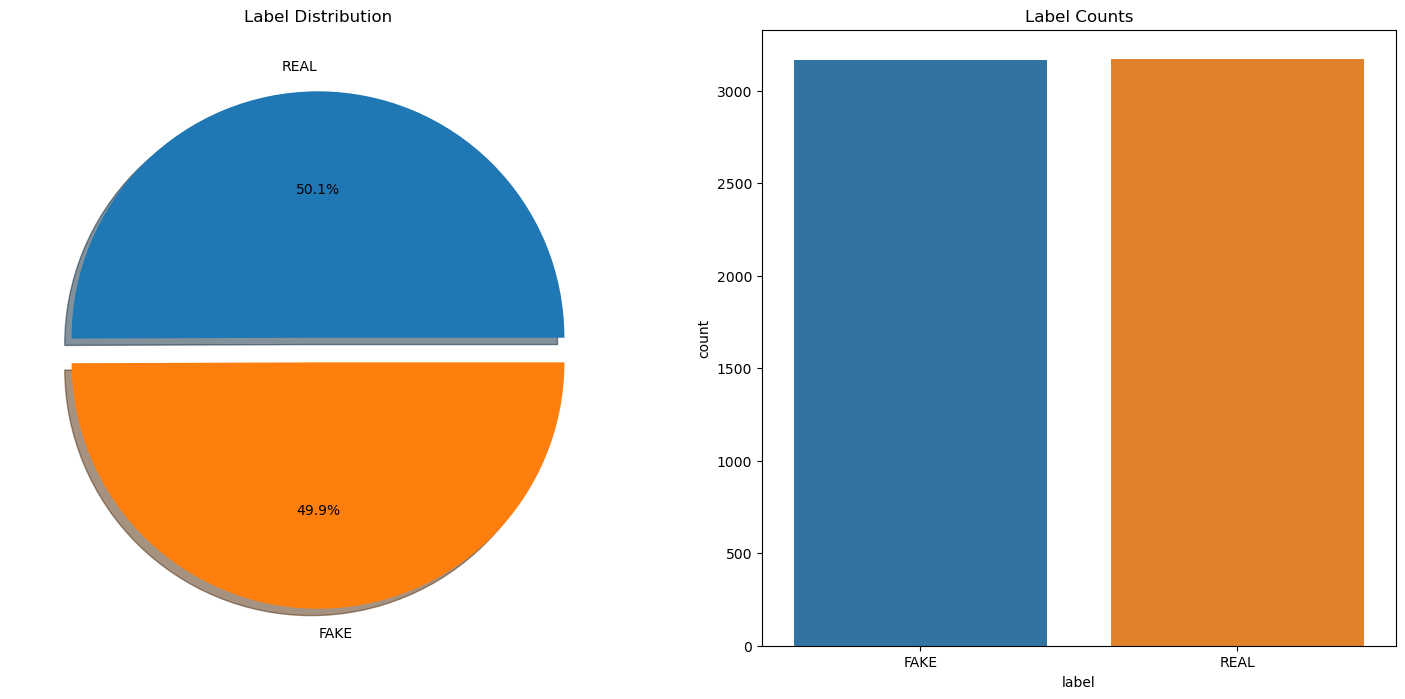

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and contains a column named 'label'
# df = pd.read_csv('your_data.csv')

# Create subplots and set the figure size
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for label distribution
df['label'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Label Distribution')
ax[0].set_ylabel('')

# Count plot for label counts
sns.countplot(x='label', data=df, ax=ax[1])
ax[1].set_title('Label Counts')

plt.show()


<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#b598a1;padding:20px;border-radius:10px;border:7px solid #f0a1a8;color:#f8f4ed">
    ✏️ &nbsp;<b>Observations in Data:</b><br />
 
   * <i> The number of REAL labels accounted for <b><u>50.1%</u></b> of the total data and <b><u>49.9%</u></b> of the FAKE labels.</i><br />

   * <i> In total, there are<b><u>3,171</u></b> real news and <b><u>3,164</u></b> fake news.</i><br />

   * <i> The number of the two labels is approximately the same.</i><br />

<a href="#toc" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

In [7]:
df['label'] = df['label'].replace("REAL", 1)
df['label'] = df['label'].replace("FAKE", 0)
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


<Axes: xlabel='label', ylabel='Unnamed: 0'>

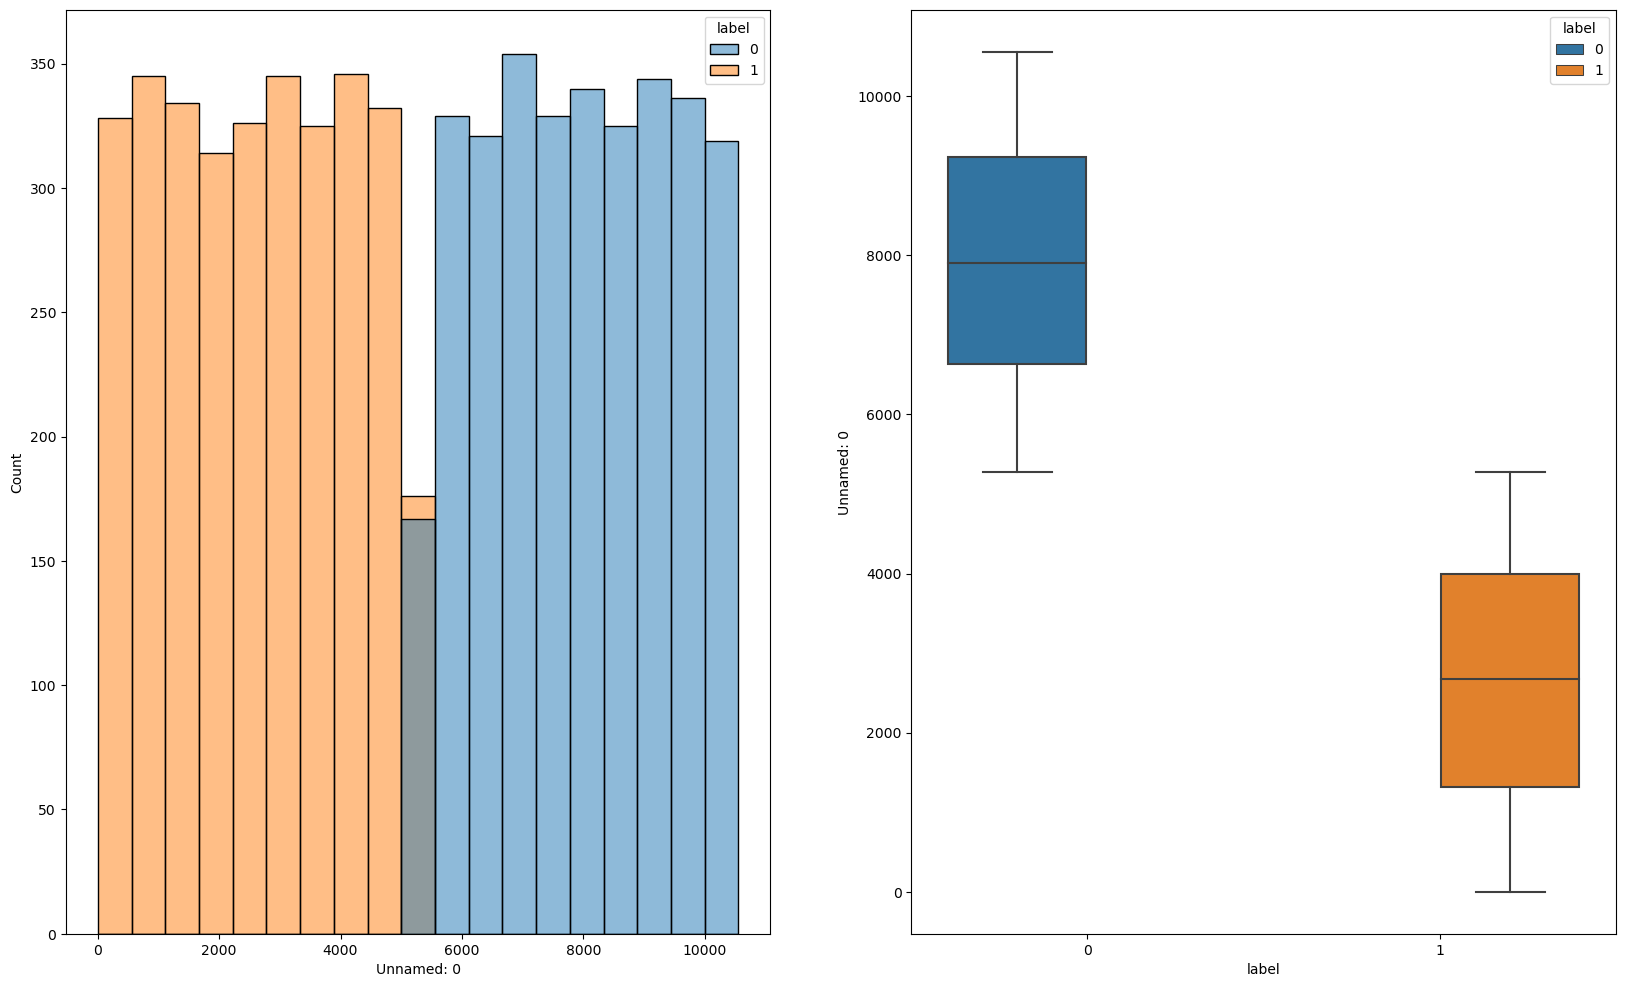

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (20, 12))

sns.histplot(ax = axes[0], x = 'Unnamed: 0', hue = 'label', fill = True, data = df)
sns.boxplot(ax = axes[1], x = 'label', y = 'Unnamed: 0', hue = 'label', data = df)

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#b598a1;padding:20px;border-radius:10px;border:7px solid #f0a1a8;color:#f8f4ed">
    🧐 &nbsp;<b>This is a very obvious and interesting detection.</b><br />
 
   * <i> In the <b><u>Unname:0</u></b>  column, <b><u>real news</u></b>  is less than its middle value, and <b><u>fake news</u></b> is greater than its middle value.</i><br />

   * <i> There are both fake and real news in the middle value cross section.</i><br />

   * <i> This made me more curious about what this column represents.</i><br />

<a href="#toc" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

<a id="2.2"></a>
## <span style="color:#f0a1a8;">View the only column of numeric type</span>

In [9]:
df['Unnamed: 0'].nunique()

6335

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#b598a1;padding:20px;border-radius:10px;border:7px solid #f0a1a8;color:#f8f4ed">
    🤔 &nbsp;<b>Now I guess this column is the ID column.</b><br />

In [10]:
df = df.rename(columns={"Unnamed: 0": "ID"}).sort_values(by="ID", axis=0)
df.head()

,ID,title,text,label
5603,2,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,1
565,3,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",1
2099,5,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,1
2197,6,"Despite Constant Debate, Americans' Abortion O...",It's been a big week for abortion news.\n\nCar...,1
5974,7,Obama Argues Against Goverment Shutdown Over P...,President Barack Obama said Saturday night tha...,1


<a id="2.3"></a>
## <span style="color:#f0a1a8;">Title exploration</span>

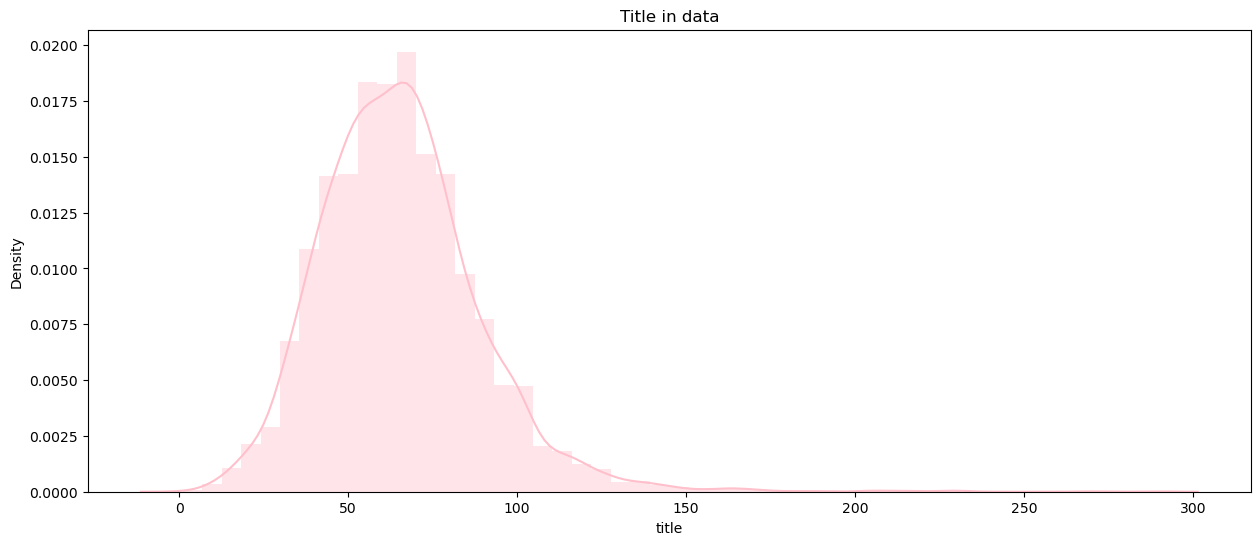

In [11]:
df_title=df['title'].str.len()
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(df_title,ax=ax,color='pink')
ax.set_title('Title in data')
plt.show()

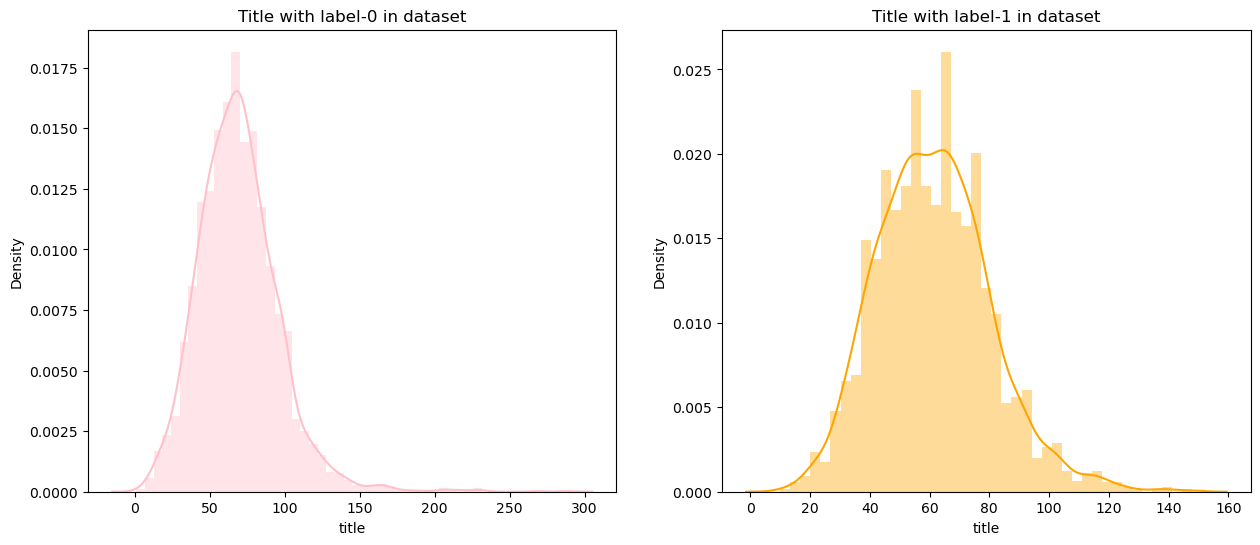

In [12]:
df_title_0=df['title'][df['label']==0].str.len()
df_title_1=df['title'][df['label']==1].str.len()

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.distplot(df_title_0,ax=ax[0],color='pink')
sns.distplot(df_title_1,ax=ax[1],color='orange')

ax[0].set_title('Title with label-0 in dataset')
ax[1].set_title('Title with label-1 in dataset')

plt.show()

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#b598a1;padding:20px;border-radius:10px;border:7px solid #f0a1a8;color:#f8f4ed">
    🧐 &nbsp;<b>Observations in Data:</b><br />
 
   * <i> The text length of fake news title is concentrated between 50 and 100.</i><br />

   * <i> The text length of the title of real news is concentrated between 40 and 80.</i><br />

   * <i> All titles longer than 200 are fake news.</i><br />

<a href="#toc" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

In [13]:
unique_title = df["title"].value_counts()[df["title"].value_counts()==1].index
duplicate_title = df["title"].value_counts()[df["title"].value_counts()>1].index
print(f"There are {len(unique_title)} non-repeating news titles")
print(f"There are {len(duplicate_title)} duplicate news titles")

There are 6183 non-repeating news titles
There are 73 duplicate news titles


### <span style="color:#f0a1a8;">Check the duplicate_title</span>

In [14]:
duplicate_title[:5]

Index(['OnPolitics | 's politics blog',
       'Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids',
       'Michael Moore Owes Me $4.99',
       'Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence',
       'Goldman Sachs Endorses Hillary Clinton For President'],
      dtype='object')

<a id="2.4"></a>
## <span style="color:#f0a1a8;">Title word cloud</span>

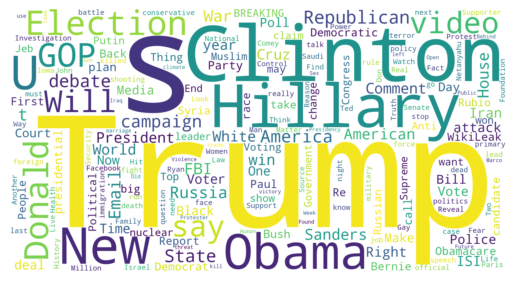

In [15]:
from wordcloud import WordCloud
titles = " ".join(title for title in df["title"])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(titles)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#b598a1;padding:20px;border-radius:10px;border:7px solid #f0a1a8;color:#f8f4ed">
    📒 &nbsp;<b>Using the word cloud, we can clearly understand which words appear most in the entire data set.</b><br />

### <span style="color:#f0a1a8;">Fake news title</span>

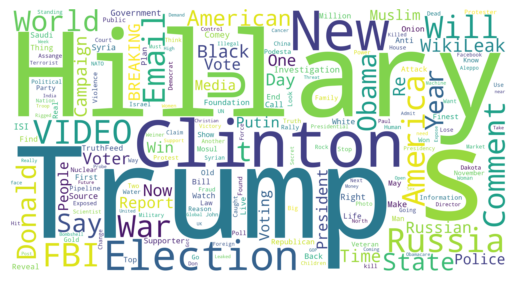

In [16]:
titles_0 = " ".join(title for title in df["title"][df["label"]==0])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(titles_0)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### <span style="color:#f0a1a8;">Real news title</span>

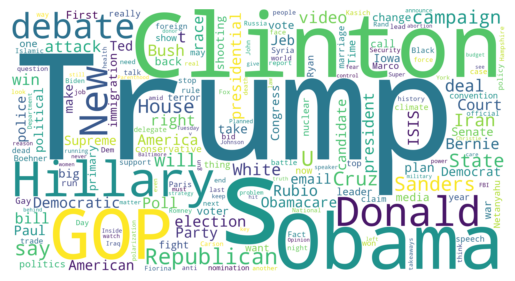

In [17]:
titles_1 = " ".join(title for title in df["title"][df["label"]==1])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(titles_1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#b598a1;padding:20px;border-radius:10px;border:7px solid #f0a1a8;color:#f8f4ed">
<b>We can also use the same method to view the words that appear most frequently in the headlines of fake news and real news.</b><br />
    
<a href="#toc" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

In [18]:
del titles, titles_0, titles_1
gc.collect()

2118

<a id="2.5"></a>
## <span style="color:#f0a1a8;">Text exploration</span>

In [19]:
# https://www.kaggle.com/code/newbieag068/quora-questions-eda-tfidf-similarity

def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

df['text'] = df['text'].apply(preprocess)

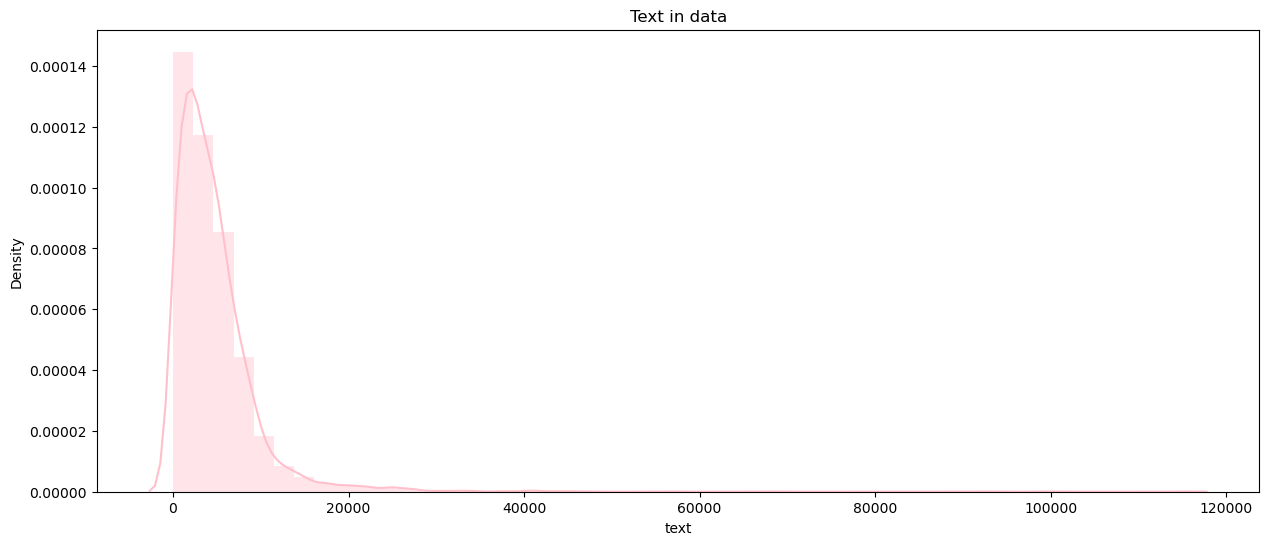

In [20]:
df_text=df['text'].str.len()
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(df_text,ax=ax,color='pink')
ax.set_title('Text in data')
plt.show()

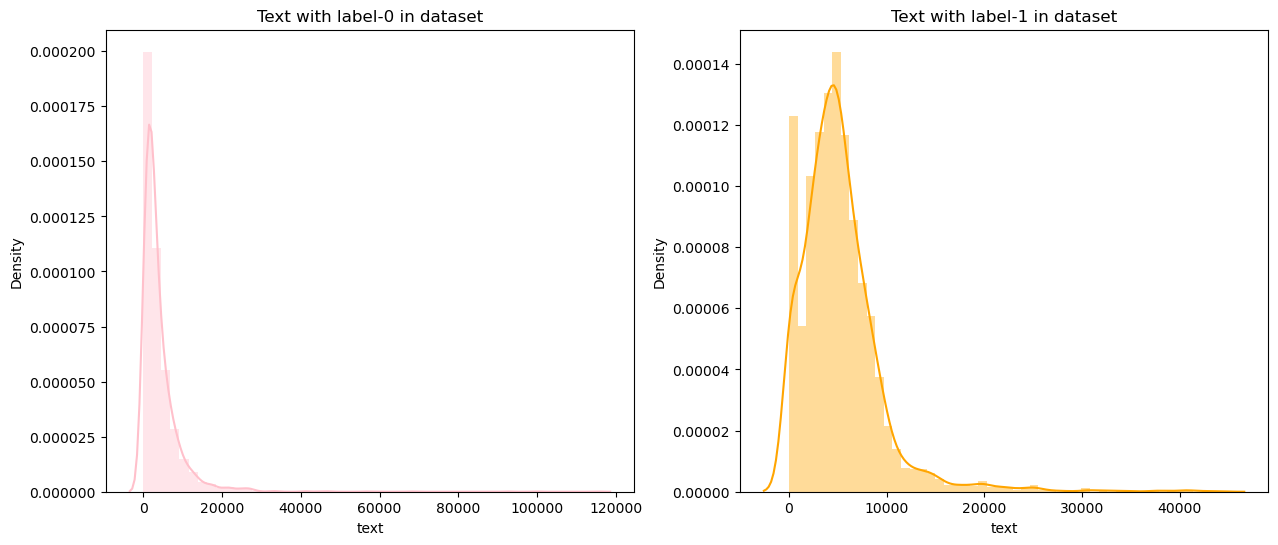

In [21]:
df_text_0=df['text'][df['label']==0].str.len()
df_text_1=df['text'][df['label']==1].str.len()

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.distplot(df_text_0,ax=ax[0],color='pink')
sns.distplot(df_text_1,ax=ax[1],color='orange')

ax[0].set_title('Text with label-0 in dataset')
ax[1].set_title('Text with label-1 in dataset')

plt.show()

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#b598a1;padding:20px;border-radius:10px;border:7px solid #f0a1a8;color:#f8f4ed">
    🧐 &nbsp;<b>Observations in Data:</b><br />
 
   * <i> The text length of most news (whether fake news or real news) is between 0 and 100.</i><br />

   * <i> Those with particularly long text content are fake news.</i><br />

<a href="#toc" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

<a id="2.6"></a>
## <span style="color:#f0a1a8;">Text word cloud</span>

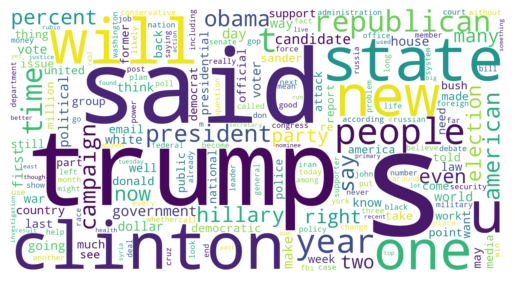

In [22]:
texts = " ".join(text for text in df["text"])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(texts)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
del texts
gc.collect()

22102

### <span style="color:#f0a1a8;">Fake news text</span>

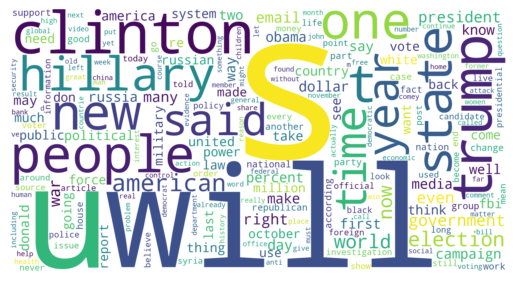

In [24]:
texts_0 = " ".join(text for text in df["text"][df["label"]==0])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(texts_0)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
del texts_0
gc.collect()

2126

### <span style="color:#f0a1a8;">Real news text</span>

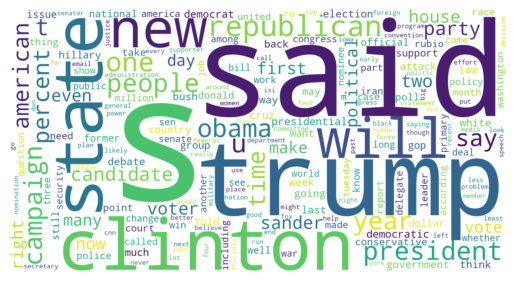

In [26]:
texts_1 = " ".join(text for text in df["text"][df["label"]==1])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(texts_1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
del texts_1
gc.collect()

2126

<a href="#toc" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

<a id="3"></a>
<div>
<h1 style="background-color:#f0a1a8;padding:20px;border-radius:10px;border:6px solid #e6d2d5;color: white;text-align:center" >Model</h1>
</div>

In [28]:
from sklearn.model_selection import StratifiedGroupKFold, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
import scikitplot as skplt


In [29]:
folds = 5
kf = StratifiedGroupKFold(n_splits=folds)

In [30]:
df_1 = df[["ID", "label"]]
df_1.head()

,ID,label
5603,2,1
565,3,1
2099,5,1
2197,6,1
5974,7,1


In [31]:
from imblearn.over_sampling import RandomOverSampler

# Now you can proceed with oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X = df_1.drop(['label'], axis=1)
y = df_1['label']
X_over, y_over = oversample.fit_resample(X, y)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.2, random_state= 42)

### <span style="color:#f0a1a8;">SVM</span>

Accuracy: 1.0
ROC AUC Score: 1.0


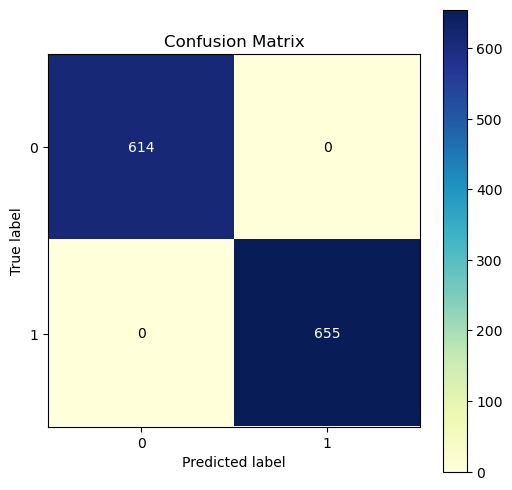

In [33]:
# https://www.kaggle.com/code/anubhavgoyal10/stroke-prediction-100-accuracy
parameters = {
    'C':[0.001, 0.01,0.1,1,10, 100, 1000], 
    'gamma':[0.001, 0.01,0.1,1,100, 1000]
}

svm = RandomizedSearchCV(SVC(probability= True), parameters, cv=5)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_svm))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1269
   macro avg       1.00      1.00      1.00      1269
weighted avg       1.00      1.00      1.00      1269

Confusion Matrix:
[[614   0]
 [  0 655]]


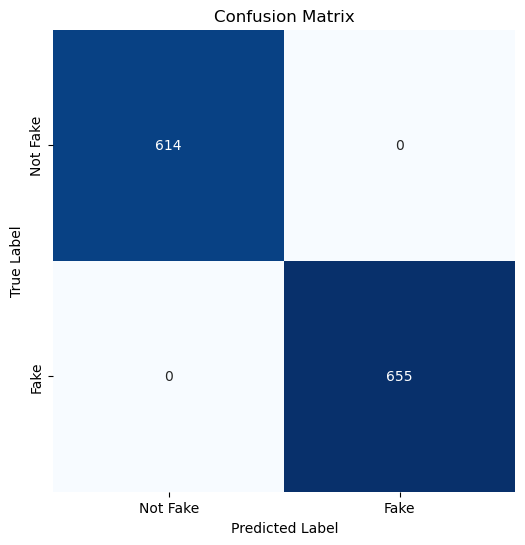

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import scikitplot as skplt

# ...

# Step 6: SVM Model
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 100, 1000]
}

svm = RandomizedSearchCV(SVC(probability=True), parameters, cv=5)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred_svm))
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix)

# Create a beautiful confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### <span style="color:#f0a1a8;">KNN</span>

Accuracy: 1.0
ROC AUC Score: 1.0


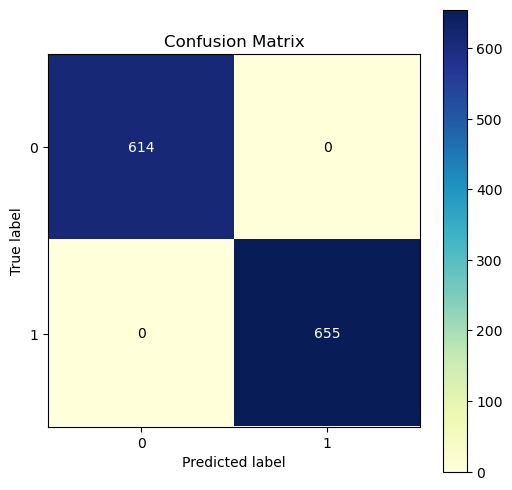

In [35]:
# https://www.kaggle.com/code/anubhavgoyal10/stroke-prediction-100-accuracy
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1269
   macro avg       1.00      1.00      1.00      1269
weighted avg       1.00      1.00      1.00      1269

Confusion Matrix:
[[614   0]
 [  0 655]]


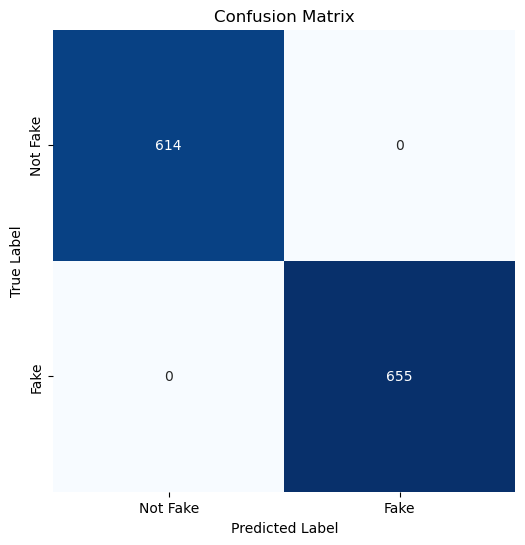

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt

# ...

# Step 6: KNN Model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_knn)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred_knn))
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(conf_matrix)

# Create a beautiful confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### <span style="color:#f0a1a8;">Random Forest</span>

Accuracy: 1.0
ROC AUC Score: 1.0


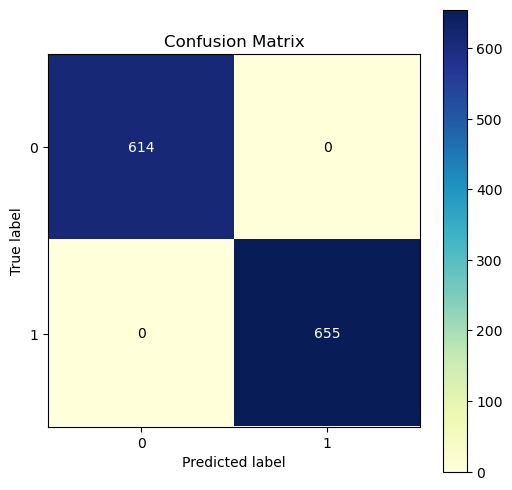

In [37]:
# https://www.kaggle.com/code/anubhavgoyal10/stroke-prediction-100-accuracy
rf = RandomForestClassifier(n_estimators= 100)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Split the Data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Step 2: Vectorize the Text Data
vectorizer = CountVectorizer()  # You can also try TfidfVectorizer for TF-IDF vectorization
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Create and Train the Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vect, y_train)

# Step 4: Make Predictions
y_pred_nb = nb_classifier.predict(X_test_vect)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_nb)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred_nb))
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8721389108129439
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       610
           1       0.86      0.90      0.88       657

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267

Confusion Matrix:
[[511  99]
 [ 63 594]]


Accuracy: 0.8721389108129439
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       610
           1       0.86      0.90      0.88       657

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267

Confusion Matrix:
[[511  99]
 [ 63 594]]


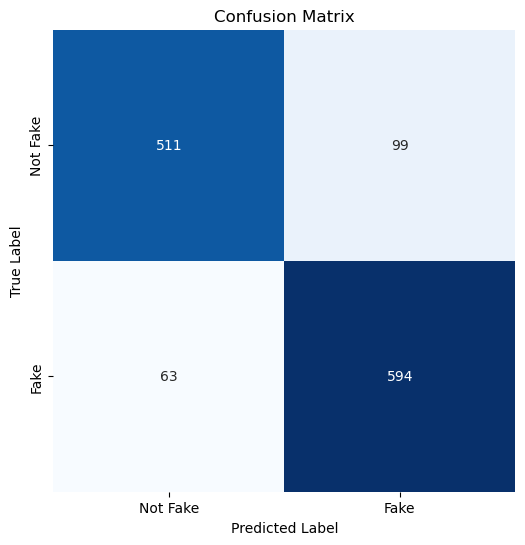

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# ...

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_nb)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred_nb))
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:')
print(conf_matrix)

# Create a beautiful confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming 'text' is the column containing the text data in your dataset
text_data = df['text'].values
labels = df['label'].values

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_data, labels, test_size=0.2, random_state=42)

# Step 2: Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Step 3: Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Step 4: Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

# Now you have your text data in a numerical format (TF-IDF representation)
# You can proceed to train and evaluate your machine learning models using X_train_tfidf and X_test_tfidf
# For example, you can use a Decision Tree classifier as follows:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 5: Create and train the Decision Tree Model
DT = DecisionTreeClassifier()
DT.fit(X_train_tfidf, y_train)

# Step 6: Make Predictions
y_pred_dt = DT.predict(X_test_tfidf)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_dt)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.7908445146014207
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       610
           1       0.79      0.82      0.80       657

    accuracy                           0.79      1267
   macro avg       0.79      0.79      0.79      1267
weighted avg       0.79      0.79      0.79      1267



<a href="#toc" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

<a id="3.2"></a>
## <span style="color:#f0a1a8;">A normal predicting process</span>

In [44]:
# ***********************************
#  Import Libraries
# ***********************************
import os
import time
import random
import Levenshtein
import difflib
import multiprocessing
import lightgbm as lgb
from tqdm.auto import tqdm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [45]:
# ***********************************
#  Reading data
# ***********************************

df = pd.read_csv("./fake_or_real_news.csv")

In [46]:
# ***********************************
#  Cleaning data
# ***********************************

# https://www.kaggle.com/currie32/quora-question-pairs/the-importance-of-cleaning-text
def text_to_wordlist(text, remove_stopwords=False, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.
    
    # Convert words to lower case and split them
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stop_words = set(stopwords.words("english"))
        text = [w for w in text if not w in stop_words]
    
    text = " ".join(text)
    
    # Remove punctuation from text
    # text = "".join([c for c in text if c not in punctuation])

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    # text = re.sub(r"\0s", "0", text) # It doesn't make sense to me
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    return(text)

df["text"] = df["text"].apply(text_to_wordlist)

In [47]:
# ***********************************
#  Splitting data
# ***********************************

y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [48]:
# ***********************************
#  Converting to vectors
# ***********************************

from sklearn.feature_extraction.text import TfidfVectorizer

vc = TfidfVectorizer()
xv_train = vc.fit_transform(x_train)
xv_test = vc.transform(x_test)

<a id="3.2.1"></a>
### <span style="color:#f0a1a8;">Only use text column</span>

### <span style="color:#f0a1a8;">KNN</span>

In [49]:
# ***********************************
#  KNN
# ***********************************

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(xv_train,y_train)
y_pred_knn = knn.predict(xv_test)
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8176795580110497
              precision    recall  f1-score   support

        FAKE       0.77      0.92      0.84       645
        REAL       0.90      0.71      0.79       622

    accuracy                           0.82      1267
   macro avg       0.83      0.82      0.81      1267
weighted avg       0.83      0.82      0.82      1267



### <span style="color:#f0a1a8;">Random Forest</span>

In [50]:
# ***********************************
#  Random Forest
# ***********************************
rf = RandomForestClassifier(n_estimators=150)
rf.fit(xv_train,y_train)
y_pred_rf = rf.predict(xv_test)
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9005524861878453
              precision    recall  f1-score   support

        FAKE       0.91      0.89      0.90       645
        REAL       0.89      0.91      0.90       622

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



### <span style="color:#f0a1a8;">Decision Tree</span>

In [51]:
# ***********************************
#  Decision Tree
# ***********************************
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
y_pred_dt = DT.predict(xv_test)
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.7892659826361483
              precision    recall  f1-score   support

        FAKE       0.80      0.78      0.79       645
        REAL       0.78      0.80      0.79       622

    accuracy                           0.79      1267
   macro avg       0.79      0.79      0.79      1267
weighted avg       0.79      0.79      0.79      1267



### <span style="color:#f0a1a8;">Gradient Boosting</span>

In [52]:
# ***********************************
#  Gradient Boosting
# ***********************************
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=42)
GBC.fit(xv_train, y_train)
y_pred_gbc = GBC.predict(xv_test)
print('Accuracy:', accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

Accuracy: 0.89344909234412
              precision    recall  f1-score   support

        FAKE       0.88      0.91      0.90       645
        REAL       0.91      0.87      0.89       622

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



### <span style="color:#f0a1a8;">PassiveAggressive</span>

In [53]:
# ***********************************
#  PassiveAggressive
# ***********************************
from sklearn.linear_model import PassiveAggressiveClassifier

PAC = PassiveAggressiveClassifier(loss = 'squared_hinge',max_iter=75,C=0.1)
PAC.fit(xv_train, y_train)
y_pred_pac = PAC.predict(xv_test)
print('Accuracy:', accuracy_score(y_test, y_pred_pac))
print(classification_report(y_test, y_pred_pac))

Accuracy: 0.9384372533543804
              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       645
        REAL       0.94      0.93      0.94       622

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [54]:
# ***********************************
#  Naive Bayes
# ***********************************
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes classifier object
NB = MultinomialNB()

# Train the Naive Bayes classifier on the training data
NB.fit(xv_train, y_train)

# Make predictions on the test data
y_pred_nb = NB.predict(xv_test)

# Evaluate the performance of the Naive Bayes classifier
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy:', accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.7892659826361483
              precision    recall  f1-score   support

        FAKE       0.98      0.60      0.74       645
        REAL       0.70      0.99      0.82       622

    accuracy                           0.79      1267
   macro avg       0.84      0.79      0.78      1267
weighted avg       0.85      0.79      0.78      1267



In [55]:
# ***********************************
#  Support Vector Machine (SVM)
# ***********************************
from sklearn.svm import SVC

# Instantiate the SVM classifier
svm = SVC(kernel='linear', C=1.0)

# Train the model on the training data
svm.fit(xv_train, y_train)

# Make predictions on the test data
y_pred_svm = svm.predict(xv_test)

# Evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9400157853196527
              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       645
        REAL       0.94      0.94      0.94       622

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [56]:
# ***********************************
#  K-Nearest Neighbors (KNN)
# ***********************************
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN classifier with k=2
knn = KNeighborsClassifier(n_neighbors=2)

# Train the model on the training data
knn.fit(xv_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(xv_test)

# Evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Accuracy: 0.771112865035517
              precision    recall  f1-score   support

        FAKE       0.70      0.96      0.81       645
        REAL       0.93      0.57      0.71       622

    accuracy                           0.77      1267
   macro avg       0.82      0.77      0.76      1267
weighted avg       0.82      0.77      0.76      1267



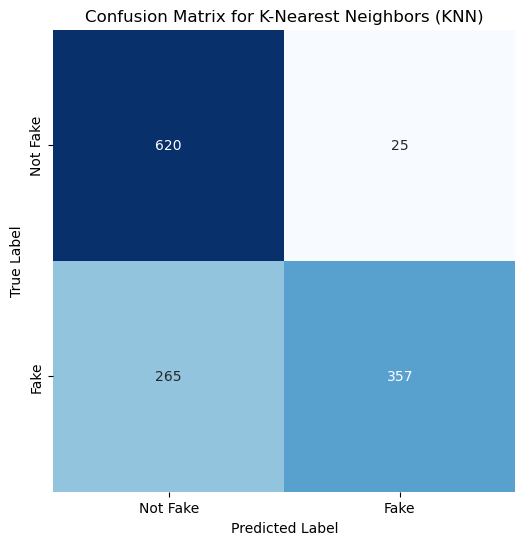

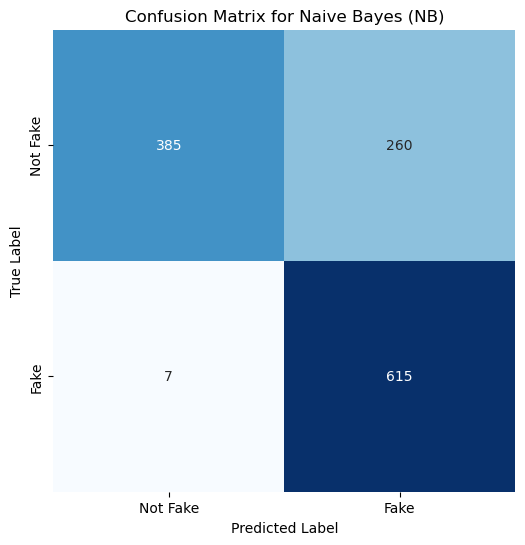

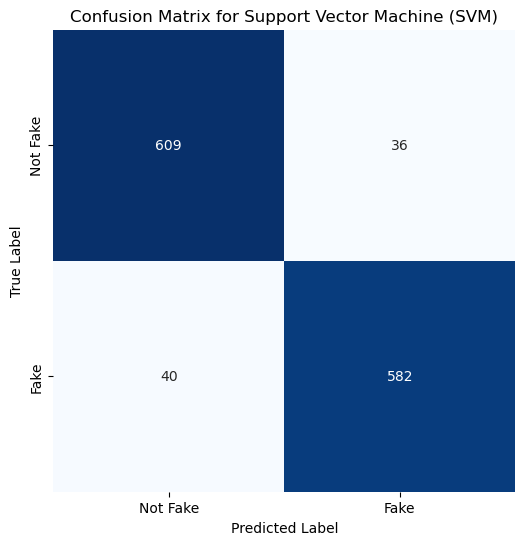

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, y_pred_knn, 'K-Nearest Neighbors (KNN)')

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes (NB)')

# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, y_pred_svm, 'Support Vector Machine (SVM)')


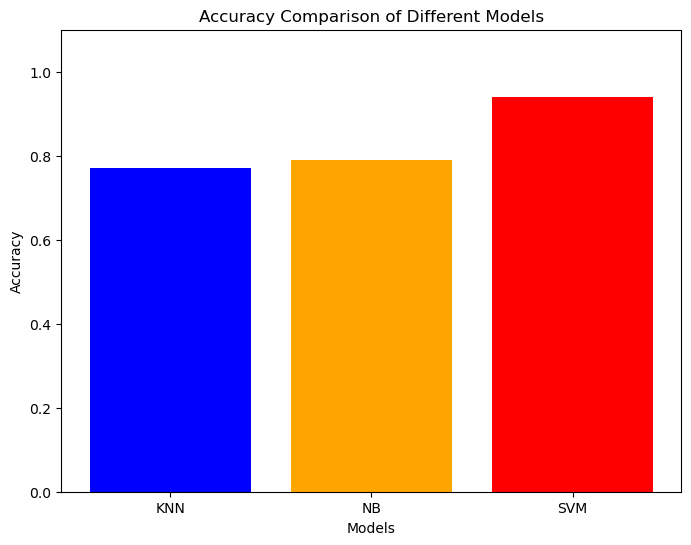

In [58]:
import matplotlib.pyplot as plt

# List of model names
models = ['KNN', 'NB', 'SVM']

# List of accuracy scores for each model
accuracy_scores = [accuracy_score(y_test, y_pred_knn),
    
                   accuracy_score(y_test, y_pred_nb),
                   accuracy_score(y_test, y_pred_svm)]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1.1)
plt.show()


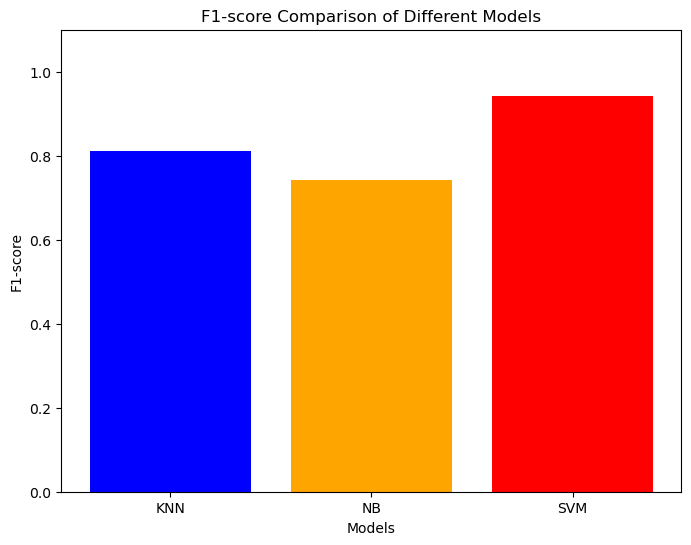

In [59]:
from sklearn.metrics import f1_score

# List of model names
models = ['KNN', 'NB', 'SVM']

# List of F1-scores for each model
f1_scores = [f1_score(y_test, y_pred_knn, pos_label='FAKE'),
             f1_score(y_test, y_pred_nb, pos_label='FAKE'),
             f1_score(y_test, y_pred_svm, pos_label='FAKE')]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, color=['blue', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-score Comparison of Different Models')
plt.ylim(0, 1.1)
plt.show()


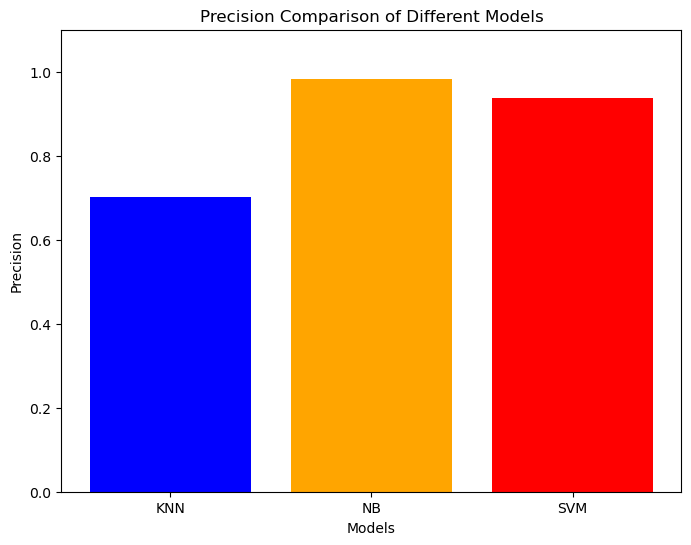

In [60]:
from sklearn.metrics import precision_score

# List of model names
models = ['KNN', 'NB', 'SVM']

# List of precision scores for each model
precision_scores = [precision_score(y_test, y_pred_knn, pos_label='FAKE'),
                    precision_score(y_test, y_pred_nb, pos_label='FAKE'),
                    precision_score(y_test, y_pred_svm, pos_label='FAKE')]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, precision_scores, color=['blue', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison of Different Models')
plt.ylim(0, 1.1)
plt.show()


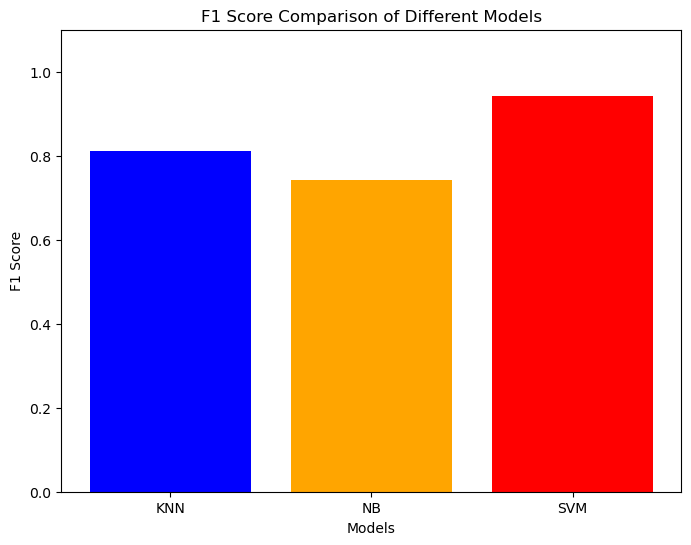

In [61]:
from sklearn.metrics import f1_score

# List of model names
models = ['KNN', 'NB', 'SVM']

# List of F1 scores for each model
f1_scores = [f1_score(y_test, y_pred_knn, pos_label='FAKE'),
             f1_score(y_test, y_pred_nb, pos_label='FAKE'),
             f1_score(y_test, y_pred_svm, pos_label='FAKE')]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, color=['blue','orange', 'red'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Different Models')
plt.ylim(0, 1.1)
plt.show()


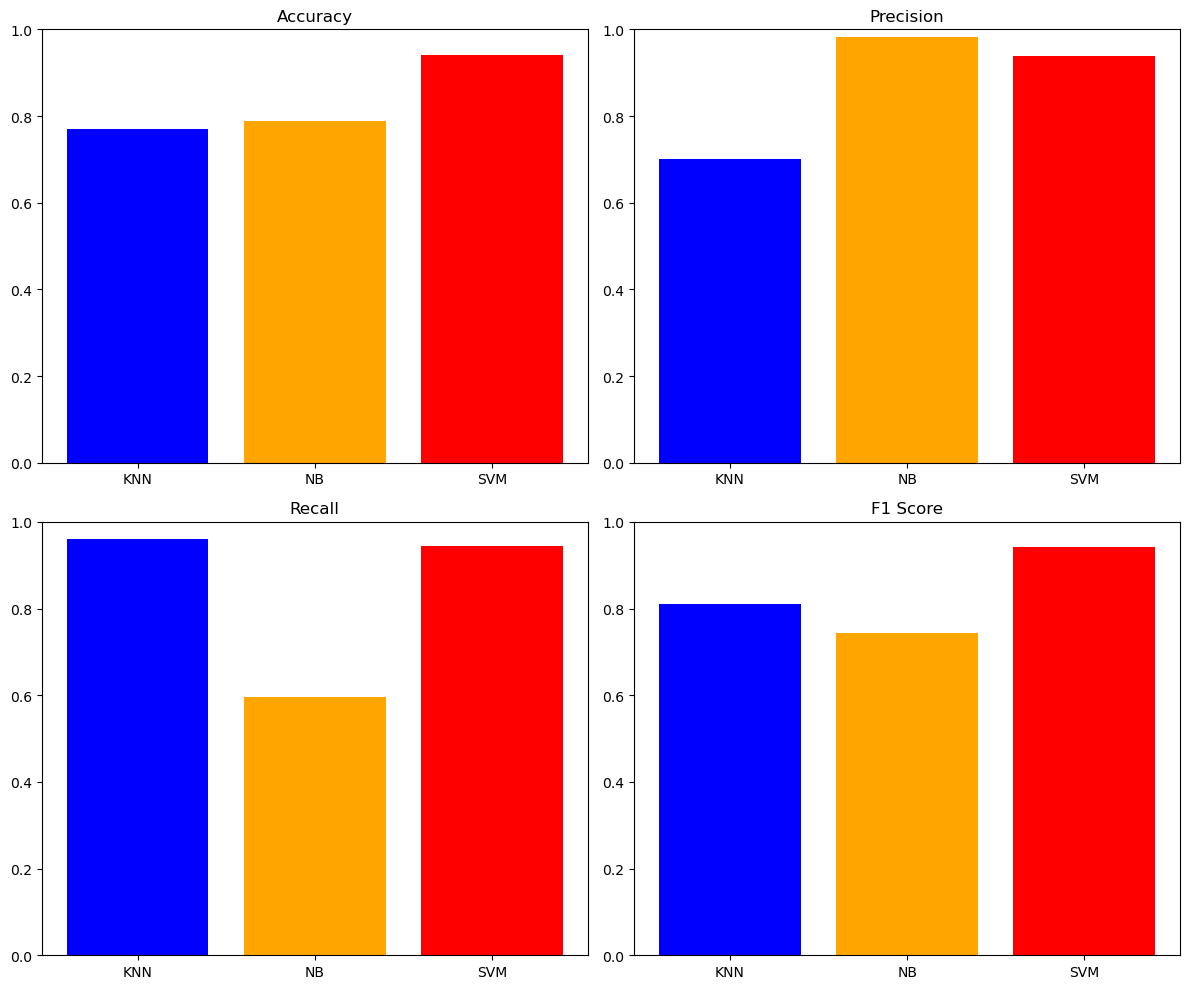

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# List of model names
models = ['KNN',  'NB', 'SVM']

# List of accuracy scores for each model
accuracy_scores = [accuracy_score(y_test, y_pred_knn),
                   accuracy_score(y_test, y_pred_nb),
                   accuracy_score(y_test, y_pred_svm)]

# List of precision scores for each model
precision_scores = [precision_score(y_test, y_pred_knn, pos_label='FAKE'),
                    precision_score(y_test, y_pred_nb, pos_label='FAKE'),
                    precision_score(y_test, y_pred_svm, pos_label='FAKE')]

# List of recall scores for each model
recall_scores = [recall_score(y_test, y_pred_knn, pos_label='FAKE'),
                 recall_score(y_test, y_pred_nb, pos_label='FAKE'),
                 recall_score(y_test, y_pred_svm, pos_label='FAKE')]

# List of F1 scores for each model
f1_scores = [f1_score(y_test, y_pred_knn, pos_label='FAKE'),
             f1_score(y_test, y_pred_nb, pos_label='FAKE'),
             f1_score(y_test, y_pred_svm, pos_label='FAKE')]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot accuracy scores
axs[0, 0].bar(models, accuracy_scores, color=['blue',  'orange', 'red'])
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim(0, 1)

# Plot precision scores
axs[0, 1].bar(models, precision_scores, color=['blue',  'orange', 'red'])
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim(0, 1)

# Plot recall scores
axs[1, 0].bar(models, recall_scores, color=['blue',  'orange', 'red'])
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylim(0, 1)

# Plot F1 scores
axs[1, 1].bar(models, f1_scores, color=['blue', 'orange', 'red'])
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim(0, 1)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


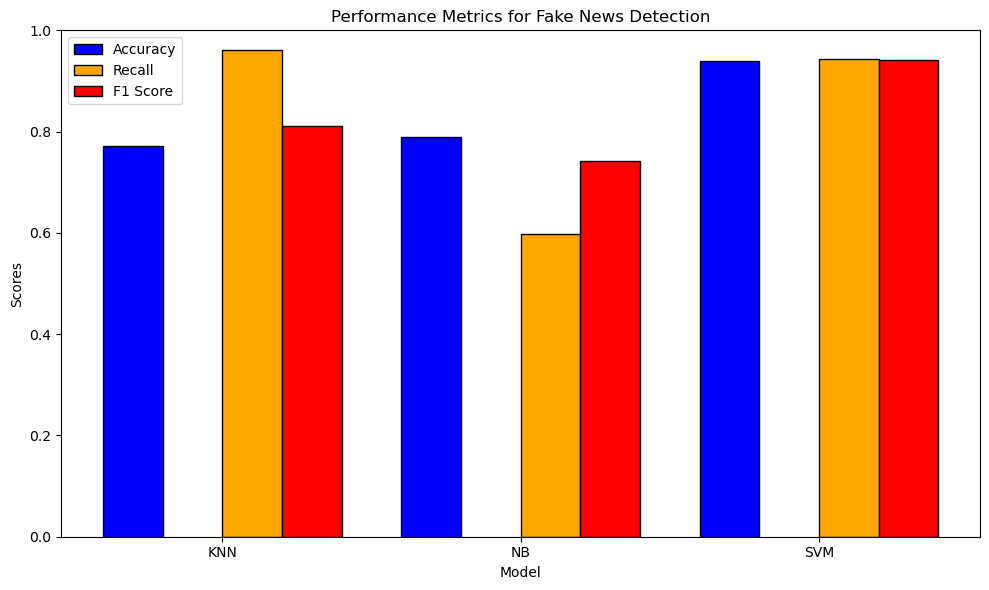

In [65]:
import numpy as np

# List of model names
models = ['KNN', 'NB', 'SVM']

# List of accuracy scores for each model
accuracy_scores = [accuracy_score(y_test, y_pred_knn),
             
                   accuracy_score(y_test, y_pred_nb),
                   accuracy_score(y_test, y_pred_svm)]

# List of precision scores for each model
precision_scores = [precision_score(y_test, y_pred_knn, pos_label='FAKE'),
                
                    precision_score(y_test, y_pred_nb, pos_label='FAKE'),
                    precision_score(y_test, y_pred_svm, pos_label='FAKE')]

# List of recall scores for each model
recall_scores = [recall_score(y_test, y_pred_knn, pos_label='FAKE'),
                
                 recall_score(y_test, y_pred_nb, pos_label='FAKE'),
                 recall_score(y_test, y_pred_svm, pos_label='FAKE')]

# List of F1 scores for each model
f1_scores = [f1_score(y_test, y_pred_knn, pos_label='FAKE'),
        
             f1_score(y_test, y_pred_nb, pos_label='FAKE'),
             f1_score(y_test, y_pred_svm, pos_label='FAKE')]

# Width of the bars
bar_width = 0.2

# Positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy_scores, color='blue', width=bar_width, edgecolor='black', label='Accuracy')

plt.bar(r3, recall_scores, color='orange', width=bar_width, edgecolor='black', label='Recall')
plt.bar(r4, f1_scores, color='red', width=bar_width, edgecolor='black', label='F1 Score')

# Add labels, ticks, and legend
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Performance Metrics for Fake News Detection')
plt.xticks([r + bar_width * 1.5 for r in range(len(models))], models)
plt.ylim(0, 1)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


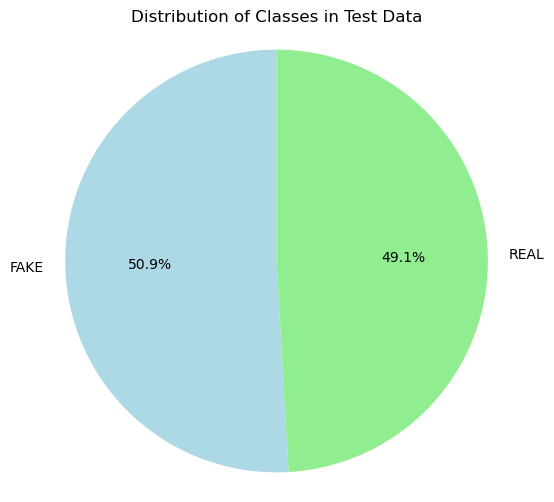

In [66]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each class in y_test
class_counts = y_test.value_counts()

# Get the class labels
class_labels = class_counts.index

# Get the class counts
class_values = class_counts.values

# Create a pie plot
plt.figure(figsize=(6, 6))
plt.pie(class_values, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Classes in Test Data')
plt.show()
